# Sustainability and Digital Finance Exam 30% coding part

# # Question 1

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


In [4]:
# 1.Download monthly data
data = yf.download('ZTS', start='2015-01-01', end='2019-12-31', interval='1mo')

[*********************100%%**********************]  1 of 1 completed


In [7]:
# 2.Compute monthy log return
data['Monthly_logReturn'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
# 2.Compute annualized return
annualized_return = data['Monthly_logReturn'].mean() * 12

In [8]:
# 3. Calculate annualised volatility
annualized_volatility = data['Monthly_logReturn'].std() * np.sqrt(12)
print(f'Annualized Return: {annualized_return * 100:.2f}%')
print(f'Annualized Volatility: {annualized_volatility * 100:.2f}%')

Annualized Return: 23.71%
Annualized Volatility: 18.54%


In [11]:
pip install yesg

Note: you may need to restart the kernel to use updated packages.


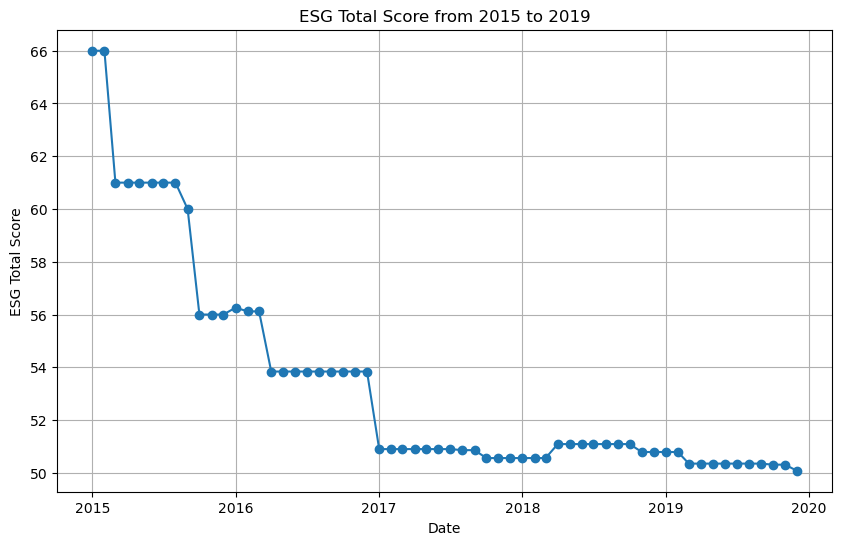

In [16]:
# 4. Download ESG Data and Handle Missing Values
import yesg
# Get the complete ESG data for the stock 'ZTS'
ESG = yesg.get_historic_esg('ZTS')

# Convert the index to datetime and filter the data for the required date range
ESG.index = pd.to_datetime(ESG.index)
start_date = '2015-01-01'
end_date = '2019-12-31'
ESG = ESG[(ESG.index >= start_date) & (ESG.index <= end_date)]

# Handle missing values by forward filling
ESG.fillna(method='ffill', inplace=True)

# Plot the ESG data
plt.figure(figsize=(10, 6))
plt.plot(ESG.index, ESG['Total-Score'], marker='o')  # Replace 'Total Score' with the actual column name for the ESG score
plt.title('ESG Total Score from 2015 to 2019')
plt.xlabel('Date')
plt.ylabel('ESG Total Score')
plt.grid(True)
plt.show()

In [17]:
# Compute the correlation between stock price and esg score
# Calculate correlation
correlation = data['Monthly_logReturn'].corr(ESG['Total-Score'])

# Print the correlation
print(f"The correlation between the stock price and esg score is {correlation:.4f}")


The correlation between the stock price and esg score is -0.1569


# Question 2

In [ ]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

In [36]:
# Beijing location details
start = datetime(2022, 7, 1)
end = datetime(2022, 7, 31)
location = Point(39.916668, 116.383331, 43.5)
data = Daily(location, start, end)
data = data.fetch()

In [40]:
# Beijing CDD calculation
T_base = 18
cdds = [max(temp - T_base, 0) for temp in data.tavg]
total_cdd = sum(cdds)
print("Total CDD:", total_cdd)

Total CDD: 292.7
